In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 4 classes: ['Cyst', 'Normal', 'Stone', 'Tumor']
Class 'Cyst': 3709 images
Class 'Normal': 5002 images
Class 'Stone': 1387 images
Class 'Tumor': 2283 images


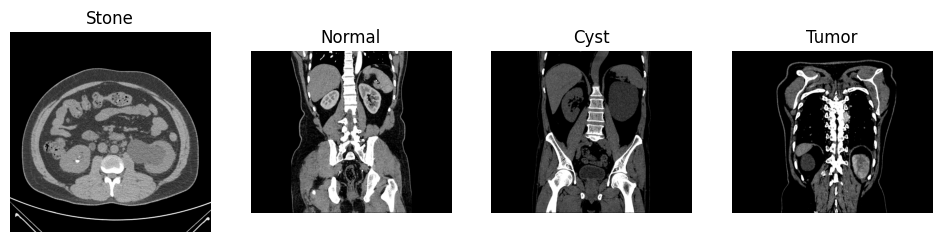

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the dataset path
dataset_path = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/"
class_labels = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])
print(f"Found {len(class_labels)} classes: {class_labels}")
image_files = {label: [] for label in class_labels}
for label in class_labels:
    class_dir = os.path.join(dataset_path, label)
    image_files[label] = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Print number of images per class
for label, files in image_files.items():
    print(f"Class '{label}': {len(files)} images")

# Function to display sample images
def show_sample_images(image_files, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i, label in enumerate(random.sample(class_labels, min(num_samples, len(class_labels)))):
        if image_files[label]:
            img_path = random.choice(image_files[label])
            img = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis("off")
    plt.show()

# Display sample images
show_sample_images(image_files)

        Image Count
Normal         5002
Cyst           3709
Tumor          2283
Stone          1387


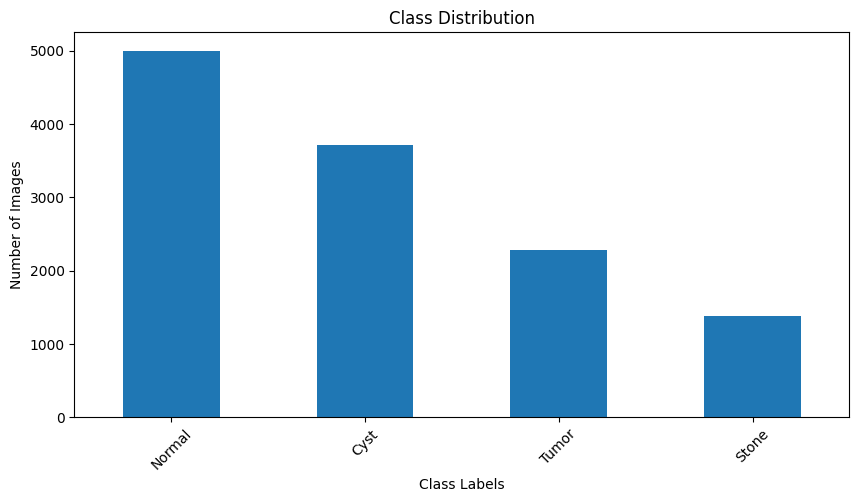

In [ ]:
import pandas as pd

# Count the number of images per class
class_counts = {label: len(files) for label, files in image_files.items()}

# Convert to a DataFrame for easy visualization
df_classes = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
df_classes.sort_values(by='Image Count', ascending=False, inplace=True)

print(df_classes)

# Plot class distribution
df_classes.plot(kind='bar', figsize=(10, 5), title="Class Distribution", legend=False)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

[[705 569]
 [512 512]
 [512 512]
 ...
 [809 655]
 [809 655]
 [512 512]]
[705 512 512 ... 809 809 512]
[569 512 512 ... 655 655 512]


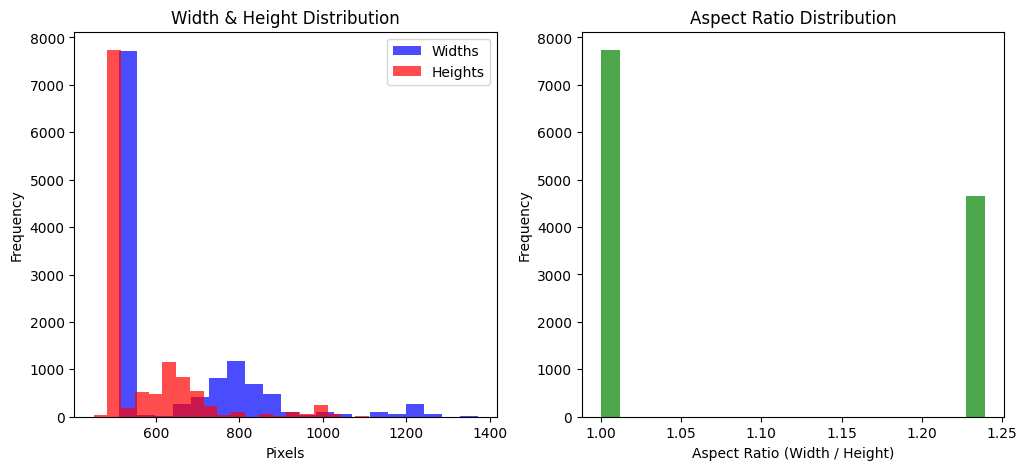

In [ ]:
import numpy as np

image_shapes = []

# Collect image sizes
for label, files in image_files.items():
    for img_path in files:
        img = Image.open(img_path)
        image_shapes.append(img.size)

# Convert to NumPy array for analysis
image_shapes = np.array(image_shapes)
widths, heights = image_shapes[:, 0], image_shapes[:, 1]
print(image_shapes)
print(widths)
print(heights)
# Plot distributions
plt.figure(figsize=(12, 5))

# Width & Height distribution
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7, label="Widths")
plt.hist(heights, bins=20, color='red', alpha=0.7, label="Heights")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Width & Height Distribution")
plt.legend()

# Aspect Ratio Distribution
aspect_ratios = widths / heights
plt.subplot(1, 2, 2)
plt.hist(aspect_ratios, bins=20, color='green', alpha=0.7)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")

plt.show()

In [ ]:
import hashlib

def get_image_hash(image_path):
    """Generate hash for an image file to detect duplicates."""
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Store hashes and detect duplicates
hashes = {}
duplicates = []

for label, files in image_files.items():
    for img_path in files:
        img_hash = get_image_hash(img_path)
        if img_hash in hashes:
            duplicates.append(img_path)
        else:
            hashes[img_hash] = img_path

print(f"Found {len(duplicates)} duplicate images.")
if duplicates:
    print("Sample duplicates:", duplicates[:5])

Found 452 duplicate images.
Sample duplicates: ['/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1059).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1285).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1282).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1286).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1284).jpg']


In [ ]:
def get_image_hash(image_path):
    """Generate a unique hash for an image file to detect duplicates."""
    with open(image_path, "rb") as f:
        return hashlib.md5(f.read()).hexdigest()

# Dictionary to store image hashes
hashes = {}
duplicates = []

for label, files in image_files.items():
    for img_path in files:
        img_hash = get_image_hash(img_path)

        if img_hash in hashes:
            duplicates.append(img_path)
        else:
            hashes[img_hash] = img_path

# Print duplicate images found
print(f"Found {len(duplicates)} duplicate images.")

# Optional: Preview duplicates before deletion
if duplicates:
    print("Sample duplicates:", duplicates[:5])

# Delete duplicates
for dup in duplicates:
    os.remove(dup)

print(f"Deleted {len(duplicates)} duplicate images.")

Found 452 duplicate images.
Sample duplicates: ['/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1059).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1285).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1282).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1286).jpg', '/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1284).jpg']
Deleted 452 duplicate images.


# **Classes with updated image count**

In [ ]:
# Read images from each class
for label in class_labels:
    class_dir = os.path.join(dataset_path, label)
    image_files[label] = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Print number of images per class
for label, files in image_files.items():
    print(f"Class '{label}': {len(files)} images")

Class 'Cyst': 3284 images
Class 'Normal': 5002 images
Class 'Stone': 1360 images
Class 'Tumor': 2283 images


In [ ]:
!pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 927.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import torch
print(torch.__version__)

2.5.1+cu124


Processing 2283 images in 'Tumor' class...


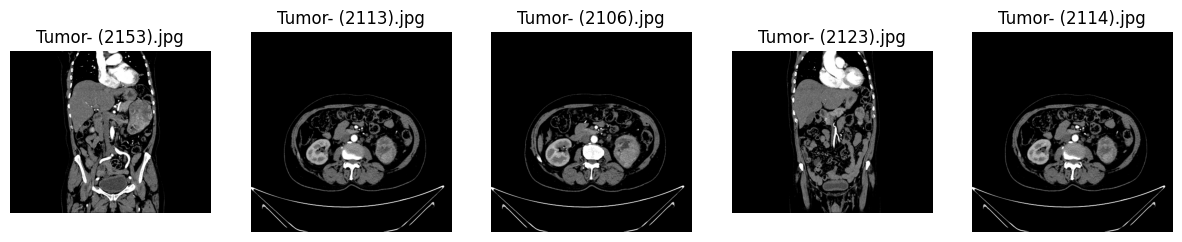

Resizing complete. Resized images are saved in: /content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Tumor


In [ ]:
import os
from PIL import Image
from torchvision import transforms
from glob import glob

# Define transformation: Resize and convert to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define input and output directories for the "Tumor" class
input_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor"
output_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Tumor"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all image file paths in the "Tumor" folder
image_paths = glob(os.path.join(input_folder, "*"))

print(f"Processing {len(image_paths)} images in 'Tumor' class...")

# Process and save images
for image_path in image_paths:
    try:
        img = Image.open(image_path).convert("RGB")
        img = transform(img)

        # Convert back to PIL Image for saving
        img = transforms.ToPILImage()(img)
        img.save(os.path.join(output_folder, os.path.basename(image_path)))

    except Exception as e:
        print(f"Skipping {image_path}: {e}")

# Display a few sample images from the resized folder
sample_images = image_paths[:5]

fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(img_path))

plt.show()
print(f"Resizing complete. Resized images are saved in: {output_folder}")

Processing 3284 images in 'Cyst' class...


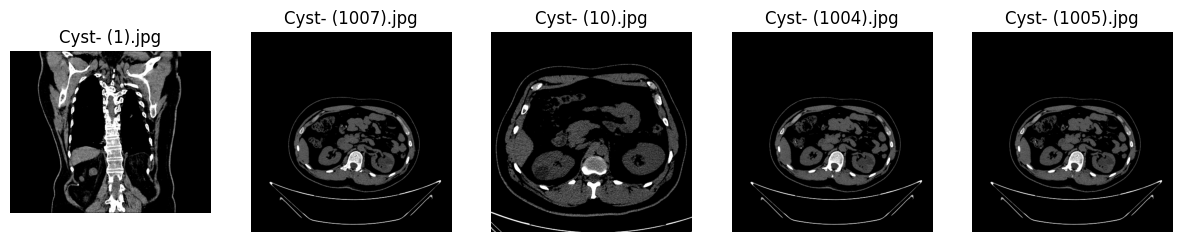

Resizing complete. Resized images are saved in: /content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Cyst


In [ ]:
import os
from PIL import Image
from torchvision import transforms
from glob import glob

# Define transformation: Resize and convert to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define input and output directories for the "Cyst" class
input_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst"
output_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Cyst"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all image file paths in the "Cyst" folder
image_paths = glob(os.path.join(input_folder, "*"))

print(f"Processing {len(image_paths)} images in 'Cyst' class...")

# Process and save images
for image_path in image_paths:
    try:
        img = Image.open(image_path).convert("RGB")
        img = transform(img)

        # Convert back to PIL Image for saving
        img = transforms.ToPILImage()(img)
        img.save(os.path.join(output_folder, os.path.basename(image_path)))

    except Exception as e:
        print(f"Skipping {image_path}: {e}")

# Display a few sample images from the resized folder
sample_images = image_paths[:5]

fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(img_path))

plt.show()
print(f"Resizing complete. Resized images are saved in: {output_folder}")

Processing 1360 images in 'Stone' class...


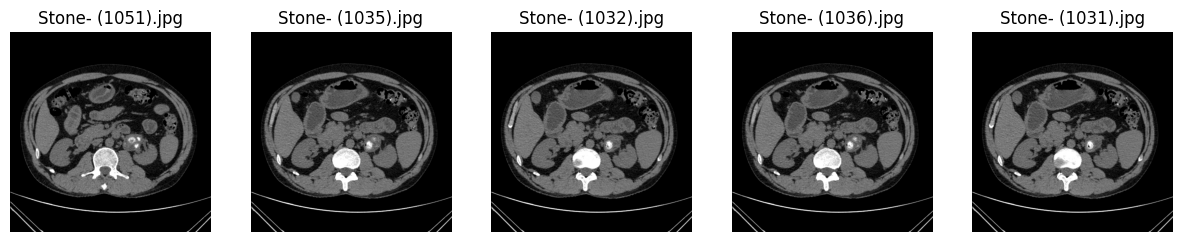

Resizing complete. Resized images are saved in: /content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Stone


In [ ]:
# Define transformation: Resize and convert to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define input and output directories for the "Stone" class
input_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone"
output_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Stone"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all image file paths in the "Stone" folder
image_paths = glob(os.path.join(input_folder, "*"))

print(f"Processing {len(image_paths)} images in 'Stone' class...")

# Process and save images
for image_path in image_paths:
    try:
        img = Image.open(image_path).convert("RGB")
        img = transform(img)

        # Convert back to PIL Image for saving
        img = transforms.ToPILImage()(img)
        img.save(os.path.join(output_folder, os.path.basename(image_path)))

    except Exception as e:
        print(f"Skipping {image_path}: {e}")

# Display a few sample images from the resized folder
sample_images = image_paths[:5]

fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(img_path))

plt.show()
print(f"Resizing complete. Resized images are saved in: {output_folder}")

Processing 5002 images in 'Normal' class...


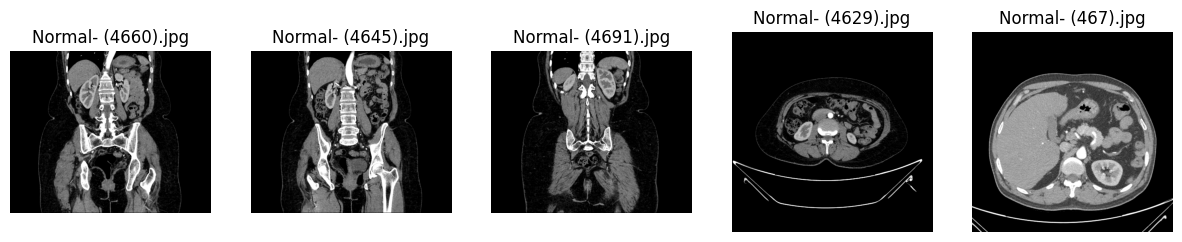

Resizing complete. Resized images are saved in: /content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Normal


In [ ]:
# Define transformation: Resize and convert to tensor
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Define input and output directories for the "Normal" class
input_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal"
output_folder = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset/Normal"

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get all image file paths in the "Normal" folder
image_paths = glob(os.path.join(input_folder, "*"))

print(f"Processing {len(image_paths)} images in 'Normal' class...")

# Process and save images
for image_path in image_paths:
    try:
        img = Image.open(image_path).convert("RGB")
        img = transform(img)

        # Convert back to PIL Image for saving
        img = transforms.ToPILImage()(img)
        img.save(os.path.join(output_folder, os.path.basename(image_path)))

    except Exception as e:
        print(f"Skipping {image_path}: {e}")

# Display a few sample images from the resized folder
sample_images = image_paths[:5]

fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
for i, img_path in enumerate(sample_images):
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(os.path.basename(img_path))

plt.show()
print(f"Resizing complete. Resized images are saved in: {output_folder}")

Found 4 classes: ['Cyst', 'Normal', 'Stone', 'Tumor']
Class 'Cyst': 3284 images
Class 'Normal': 5002 images
Class 'Stone': 1360 images
Class 'Tumor': 2283 images


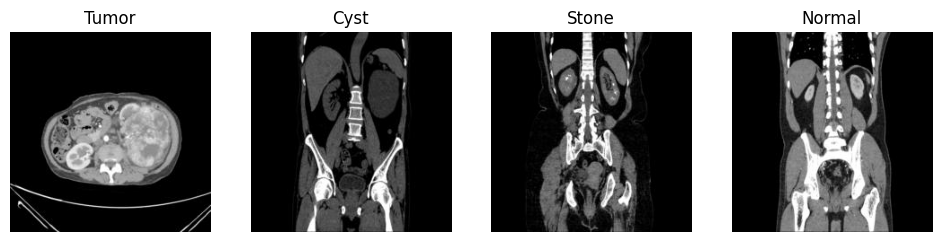

In [ ]:
# Define the dataset path
dataset_path = "/content/drive/MyDrive/DATA 606 - Capstone Project/CT Scan/Resized_CT_Kidney_Dataset"

# Get class labels (folder names)
class_labels = sorted([d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))])

# Print basic info
print(f"Found {len(class_labels)} classes: {class_labels}")

# Dictionary to store image file paths
image_files = {label: [] for label in class_labels}

# Read images from each class
for label in class_labels:
    class_dir = os.path.join(dataset_path, label)
    image_files[label] = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Print number of images per class
for label, files in image_files.items():
    print(f"Class '{label}': {len(files)} images")

# Function to display sample images
def show_sample_images(image_files, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i, label in enumerate(random.sample(class_labels, min(num_samples, len(class_labels)))):
        if image_files[label]:
            img_path = random.choice(image_files[label])
            img = Image.open(img_path)
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(img)
            plt.title(label)
            plt.axis("off")
    plt.show()

# Display sample images
show_sample_images(image_files)

        Image Count
Normal         5002
Cyst           3284
Tumor          2283
Stone          1360


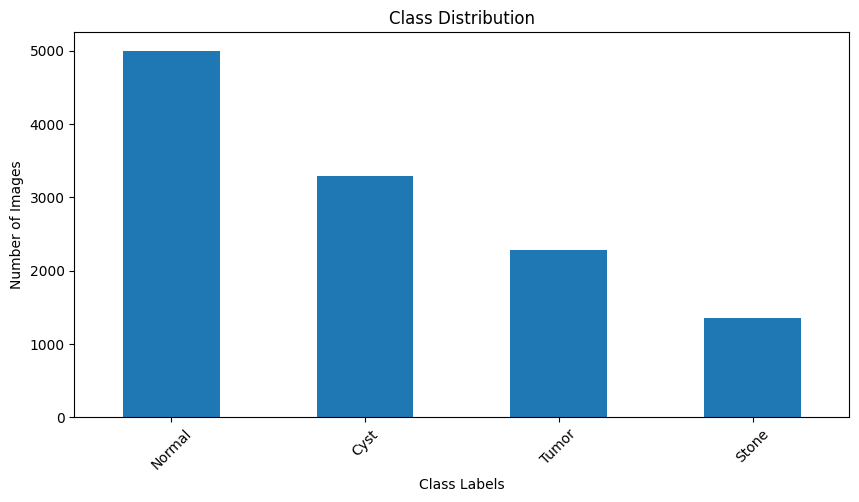

In [ ]:
# Count the number of images per class
class_counts = {label: len(files) for label, files in image_files.items()}

# Convert to a DataFrame for easy visualization
df_classes = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
df_classes.sort_values(by='Image Count', ascending=False, inplace=True)

print(df_classes)

# Plot class distribution
df_classes.plot(kind='bar', figsize=(10, 5), title="Class Distribution", legend=False)
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

[[224 224]
 [224 224]
 [224 224]
 ...
 [224 224]
 [224 224]
 [224 224]]
[224 224 224 ... 224 224 224]
[224 224 224 ... 224 224 224]


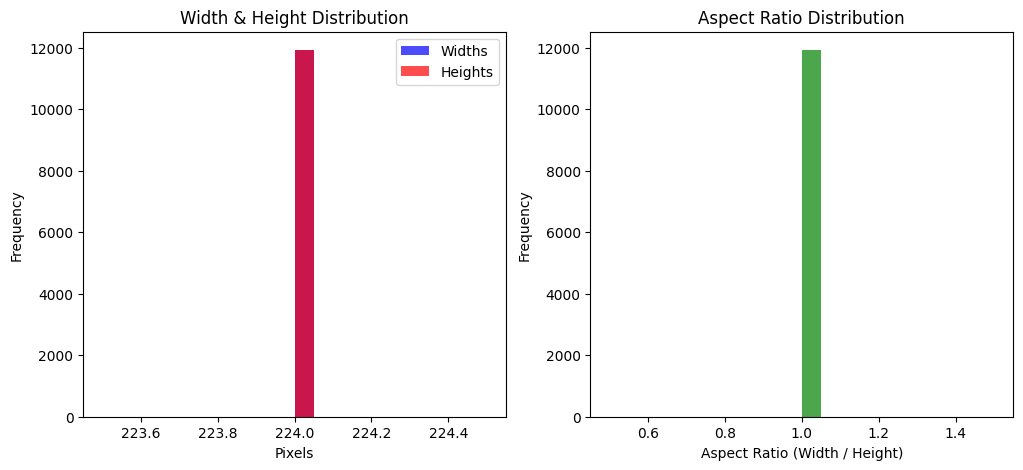

In [ ]:
image_shapes = []

# Collect image sizes
for label, files in image_files.items():
    for img_path in files:
        img = Image.open(img_path)
        image_shapes.append(img.size)

# Convert to NumPy array for analysis
image_shapes = np.array(image_shapes)
widths, heights = image_shapes[:, 0], image_shapes[:, 1]
print(image_shapes)
print(widths)
print(heights)
# Plot distributions
plt.figure(figsize=(12, 5))

# Width & Height distribution
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='blue', alpha=0.7, label="Widths")
plt.hist(heights, bins=20, color='red', alpha=0.7, label="Heights")
plt.xlabel("Pixels")
plt.ylabel("Frequency")
plt.title("Width & Height Distribution")
plt.legend()

# Aspect Ratio Distribution
aspect_ratios = widths / heights
plt.subplot(1, 2, 2)
plt.hist(aspect_ratios, bins=20, color='green', alpha=0.7)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution")

plt.show()